In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
ride_share_df = pd.read_csv("/content/drive/MyDrive/ML Project/rideshare_kaggle.csv")

In [ ]:
! pip install chart_studio

     |████████████████████████████████| 64 kB 2.3 MB/s 


In [ ]:
import plotly.express as px

**Month Stats**

In [ ]:
df_month =ride_share_df.groupby(by=["month"]).size().reset_index(name="counts")
px.bar(data_frame=df_month, x="month", y="counts", color="month", barmode="group")

**Day Stats**

In [ ]:
df_day =ride_share_df.groupby(by=["day"]).size().reset_index(name="counts")
px.bar(data_frame=df_day, x="day", y="counts", color="day", barmode="group")

**Hour Stats**

In [ ]:
df_hour =ride_share_df.groupby(by=["hour"]).size().reset_index(name="counts")
px.bar(data_frame=df_hour, x="hour", y="counts", color="hour", barmode="group")

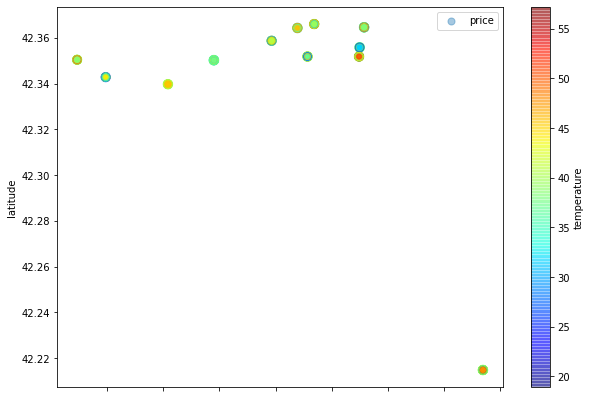

In [ ]:
ride_share_df.plot(kind="scatter", x="longitude", y="latitude",
    s=ride_share_df['price'], label="price",
    c="temperature", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

**Price Analysis**

In [ ]:
import plotly.figure_factory as ff
import random
random.seed(100)

In [ ]:
df_temp = ride_share_df.sample(frac =.25)

In [ ]:
fig = ff.create_distplot([df_temp["price"].dropna().values.tolist()], group_labels=['distplot'])
fig.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(x=ride_share_df["distance"], y=ride_share_df["price"], s=ride_share_df["surge_multiplier"], alpha=0.5)
plt.show()

In [ ]:
df_surge = ride_share_df[ride_share_df["surge_multiplier"]>2.0]
plt.figure(figsize=(16,8))
plt.scatter(x=df_surge["distance"], y=df_surge["price"], marker='o', c='r',s=df_surge["surge_multiplier"], alpha=0.5)
plt.show()

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(ride_share_df.corr(), fignum=f.number)
plt.xticks(range(ride_share_df.select_dtypes(['number']).shape[1]), ride_share_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(ride_share_df.select_dtypes(['number']).shape[1]), ride_share_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

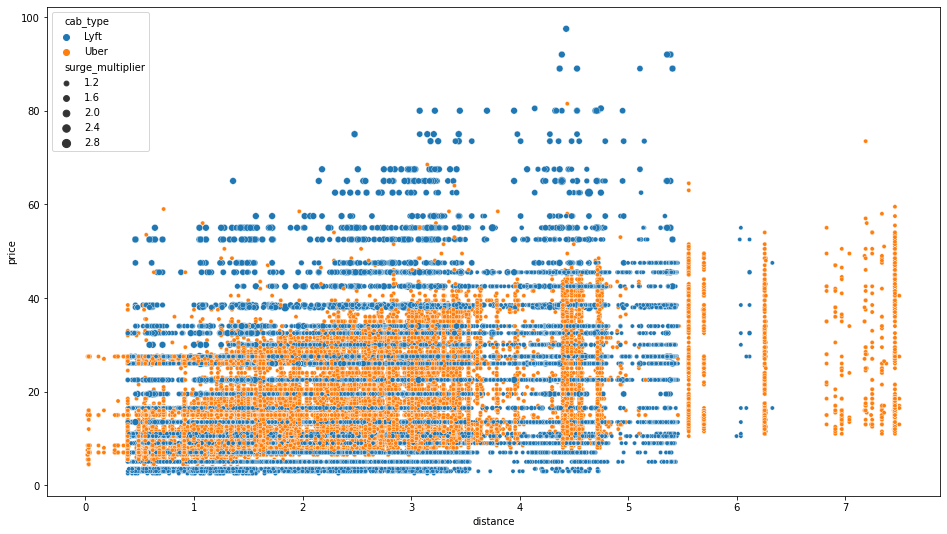

In [ ]:
df = ride_share_df[(ride_share_df["hour"]>=22) | (ride_share_df["hour"]<=4)]
plt.figure(figsize=(16,9))
sns.scatterplot(data = df, x = "distance",
                y = "price", hue = "cab_type", size = "surge_multiplier")
plt.show()

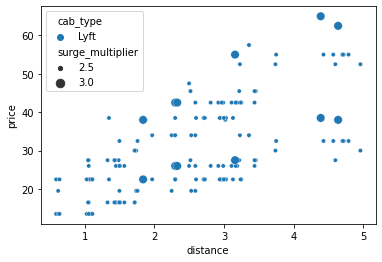

In [ ]:
sns.scatterplot(data = df_surge, x = "distance",
                y = "price", hue = "cab_type", size = "surge_multiplier")
plt.show()